# Logistic Regression

### 📘 **Definition of Logistic Regression**

> **Logistic Regression** is a statistical method used in **machine learning** to **predict binary outcomes**  
(like yes/no, true/false, spam/not spam) based on one or more input features.

Although it has "regression" in its name, it's actually used for **classification**, not regression.

---

### 🧠 **Why not Linear Regression?**

Linear regression gives outputs like 0.3, 5.6, or -2.  
But in classification, we want outputs like:
- **0 or 1**
- **True or False**
- **Class A or Class B**

That’s where logistic regression comes in — it squashes the output between 0 and 1 using a **sigmoid function**.

---

### 📐 **Sigmoid Function Formula**

$[
\sigma(z) = \frac{1}{1 + e^{-z}}
$]

Where:
- $( z = w_1x_1 + w_2x_2 + ... + w_nx_n + b $)
- $( \sigma(z) $) is the predicted probability that the output is 1 (True)

---

### ✅ **Final Logistic Regression Equation**

$[
P(y = 1 \mid x) = \frac{1}{1 + e^{-(w^T x + b)}}
$]

Where:
- $( x $): input features  
- $( w $): weights  
- $( b \): bias  
- $( P(y = 1 \mid x) $): probability that the class is 1


In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [2]:
# load the data
dataset = pd.read_csv("logistic_regression_dataset.csv")
dataset.head(3)

,Feature1,Feature2,Target
0,2.745071,3.756989,0
1,1.792604,2.077835,0
2,2.971533,3.869606,0


In [3]:
# check the shape of dataset
dataset.shape

(600, 3)

In [4]:
# Preprocession, check the isnull, if found then remove those
dataset.isnull().sum()

Feature1    0
Feature2    0
Target      0
dtype: int64

In [5]:
dataset['Feature1'].fillna(dataset['Feature1'].mean(), inplace=True)

C:\Users\Jeetendra\AppData\Local\Temp\ipykernel_11068\1547259773.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Feature1'].fillna(dataset['Feature1'].mean(), inplace=True)


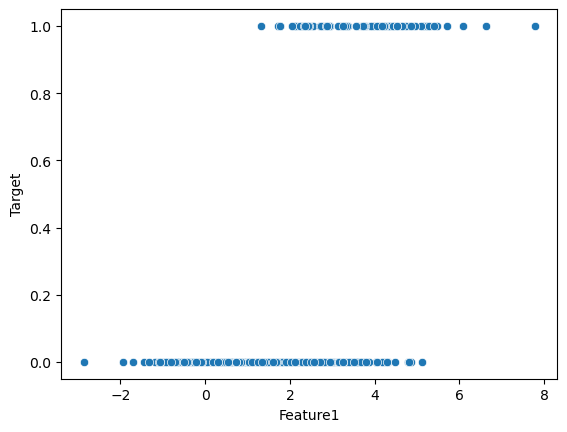

In [6]:
# now check the graph for relationship
sns.scatterplot(x='Feature1', y='Target', data=dataset)
plt.show()

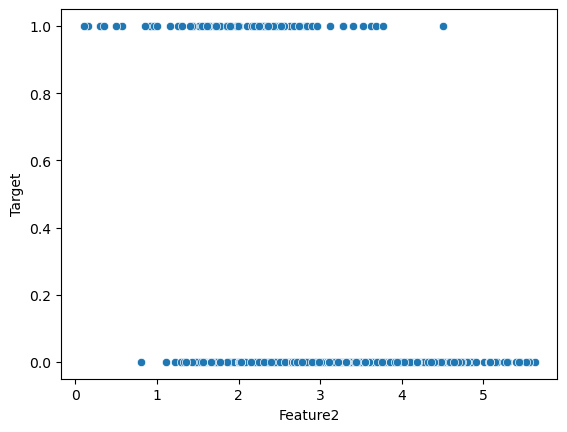

In [7]:
sns.scatterplot(x='Feature2', y='Target', data=dataset)
plt.show()

In [8]:
# train test ans split
from sklearn.model_selection import train_test_split

In [9]:
x = dataset[['Feature1']]
y = dataset['Target']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying the Logistic Regression


## Binary Classification

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
# model preparation and train the model
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [13]:
# now check the accuracy
lr.score(x_test, y_test)

0.9166666666666666

In [14]:
# now predict one of the result
dataset.head(10)  # 3.151152	1.755345	1
lr.predict([[3.151152]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

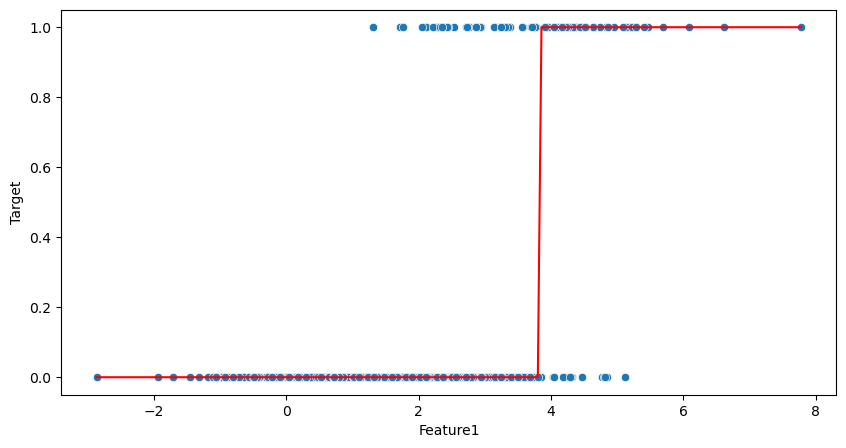

In [15]:
#now plot the graph
plt.figure(figsize=(10,5))
sns.scatterplot(x='Feature1', y='Target', data=dataset)
sns.lineplot(x = 'Feature1', y= lr.predict(x), data=dataset, color='red')
plt.show()

## Multiclass Classification (using both the features)

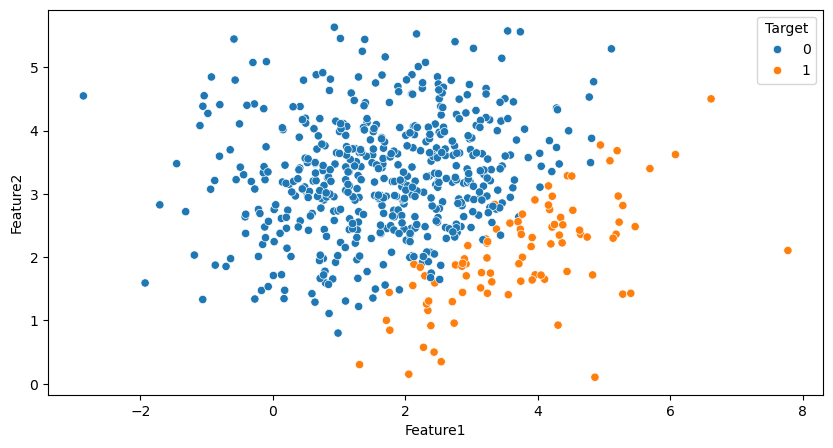

In [16]:
# check the graph for linearity 
plt.figure(figsize=(10,5))
sns.scatterplot(x='Feature1', y='Feature2', data=dataset, hue='Target')
plt.show()

In [17]:
# feature selection
x = dataset.iloc[:, :-1]
y = dataset['Target']

In [18]:
# now train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# model prepration and train
lr.fit(x_train, y_train)

LogisticRegression()

In [20]:
# check the accuracy
lr.score(x_test, y_test)

0.9666666666666667

In [21]:
# now test the data using # 3.151152	1.755345	1
lr.predict([[3.151152, 1.755345]])

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [23]:
# now plot the graph using mlxtend
from mlxtend.plotting import plot_decision_regions

d:\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


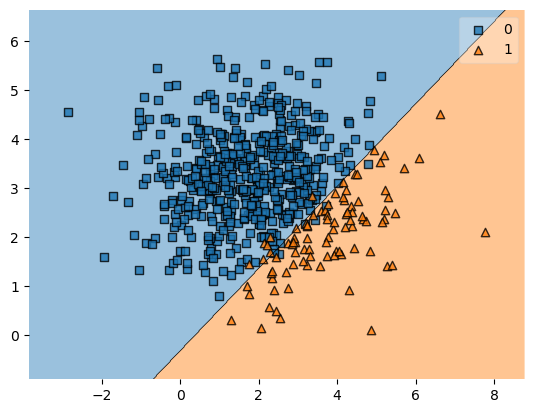

In [24]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()

In [26]:
# now check the m1x1 + m2x2 + c
# now check the value of m1, m2 and c
lr.coef_, lr.intercept_

(array([[ 3.0622664 , -3.65390664]]), array([-1.15491943]))